<a href="https://colab.research.google.com/github/quangnguyen-james/Datamining-Technical/blob/main/Classification_Ch%E1%BB%AF_vi%E1%BA%BFt_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

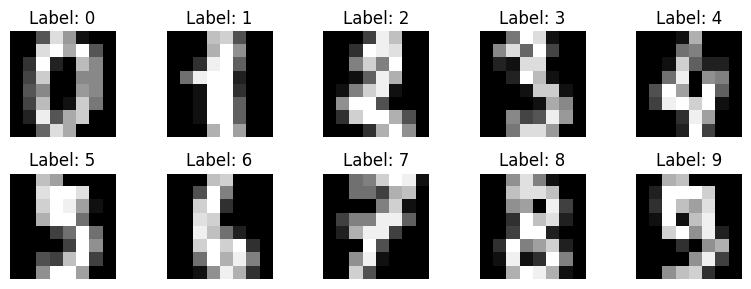

In [ ]:
# Tải dữ liệu
digits = load_digits()
X = digits.data
y = digits.target

# Xem thử vài hình ảnh
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9722222222222222
Precision: 0.9740424119023985
Recall: 0.9727003722185199
F1-Score: 0.9732067700933176


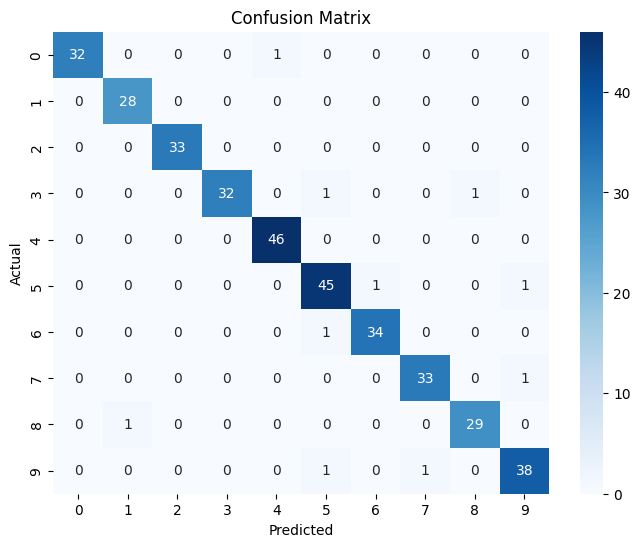

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
# Accuracy tổng thể
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1 (trung bình macro)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Báo cáo chi tiết cho từng lớp
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Base learner: cây quyết định nông (stump)
base_learner = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=base_learner, n_estimators=100, random_state=42)

# Huấn luyện
ada_model.fit(X_train, y_train)

# Dự đoán
y_pred_ada = ada_model.predict(X_test)

Accuracy (AdaBoost): 0.8277777777777777
Precision (AdaBoost): 0.839817745204669
Recall (AdaBoost): 0.8291824007376055
F1-Score (AdaBoost): 0.8279065448648637


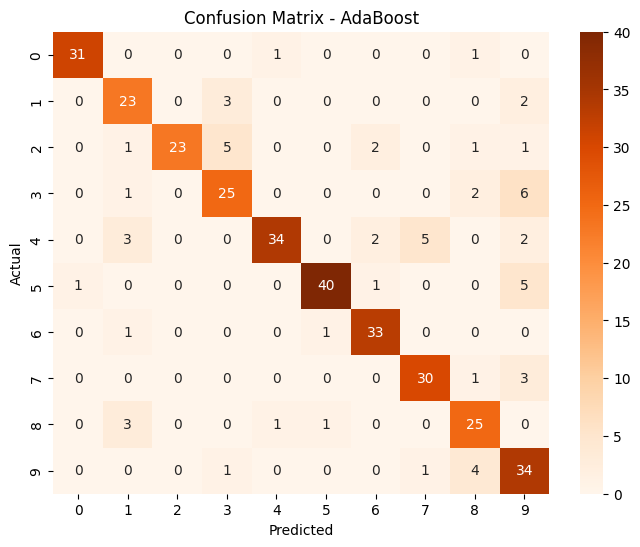

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.72      0.82      0.77        28
           2       1.00      0.70      0.82        33
           3       0.74      0.74      0.74        34
           4       0.94      0.74      0.83        46
           5       0.95      0.85      0.90        47
           6       0.87      0.94      0.90        35
           7       0.83      0.88      0.86        34
           8       0.74      0.83      0.78        30
           9       0.64      0.85      0.73        40

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.85      0.83      0.83       360



In [ ]:
print("Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_ada))
print("Precision (AdaBoost):", precision_score(y_test, y_pred_ada, average='macro'))
print("Recall (AdaBoost):", recall_score(y_test, y_pred_ada, average='macro'))
print("F1-Score (AdaBoost):", f1_score(y_test, y_pred_ada, average='macro'))

# Ma trận nhầm lẫn
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Báo cáo chi tiết
print(classification_report(y_test, y_pred_ada))
